<a href="https://colab.research.google.com/github/waiyankyaw961999/ML_DL_learningpath/blob/master/Guided%20Project/Logistic_Regression_with_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Project-Based Course Overview

Course Name: [Logistic Regression with Numpy and Python](https://www.coursera.org/programs/c07ac4b8-d292-4225-87cd-a06f185d2af0/browse?=&productId=OODC_V7vEeq8nQ6aNj4vtQ&productType=course&query=Machine+Learning&showMiniModal=true)

Instructors: Snehan Kekre

This is a project-based course which takes approximately 1.5 hrs to finish.


## Course Objectives
In this course, we are going to focus on three learning objectives:

1. Implement the gradient descent algorithm from scratch.
2. Perform logistic regression with NumPy and Python.
3. Create data visualizations with Matplotlib and Seaborn

By the end of this course, you will be able to build logistic regression models from scratch using NumPy and Python, without the use of machine learning frameworks such as scikit-learn and statsmodels.

# Task 1: Introduction and Project Overview
* Introduction to the data set and the problem overview.
* See a demo of the final product you will build by the end of this project.
* Introduction to the Rhyme interface.

# Task 2: Load the Data and Import Libraries
* Load the dataset using pandas.
* Import essential modules and helper functions from NumPy and Matplotlib.
* Explore the pandas dataframe using the head() and info() functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MC_Colab/Data/DMV_Written_Tests.csv')
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
scores = data[['DMV_Test_1','DMV_Test_2']].values
results = data['Results'].values

#Task 3: Visualize the Data
* Before starting on any task, it is often useful to understand the data by visualizing it.
* For this dataset, we can use a scatter plot using Seaborn to visualize the data, since it has only two variables: scores for test 1, scores for test 2.

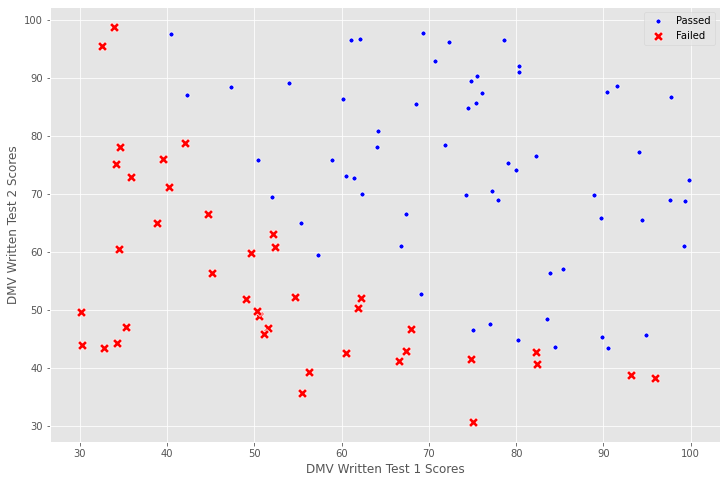

In [ ]:
passed = (results==1).reshape(100,1)

failed = (results== 0).reshape(100,1)

ax = sns.scatterplot(x= scores[passed[:,0],0],
                     y = scores[passed[:,0],1],
                     marker = ".",
                     color = 'blue',
                     s = 100)
                     
sns.scatterplot(x= scores[failed[:,0],0],
                     y = scores[failed[:,0],1],
                     marker = "X",
                     color = 'red',
                     s = 100)

ax.set(xlabel = "DMV Written Test 1 Scores", ylabel = 'DMV Written Test 2 Scores')
ax.legend(['Passed','Failed'])
plt.show();

#Task 4: Define the Logistic Sigmoid Function 𝜎(𝑧)
* We can interpret the output of the logistic sigmoid function as a probability, since this function outputs in the range 0 to 1 for any input.
* We can threshold the function at 50% to make our classification.
* If the output is greater than or equal to 0.5, we classify it as passed, and less than 0.5 as failed.
* The maximal uncertainty, we can easily see if we plug in 0 as the input. So when the model is most uncertain it tells you the data point has a 50% probability of being in either of the classes.
* We’re going to be using this function to make our predictions based on the input
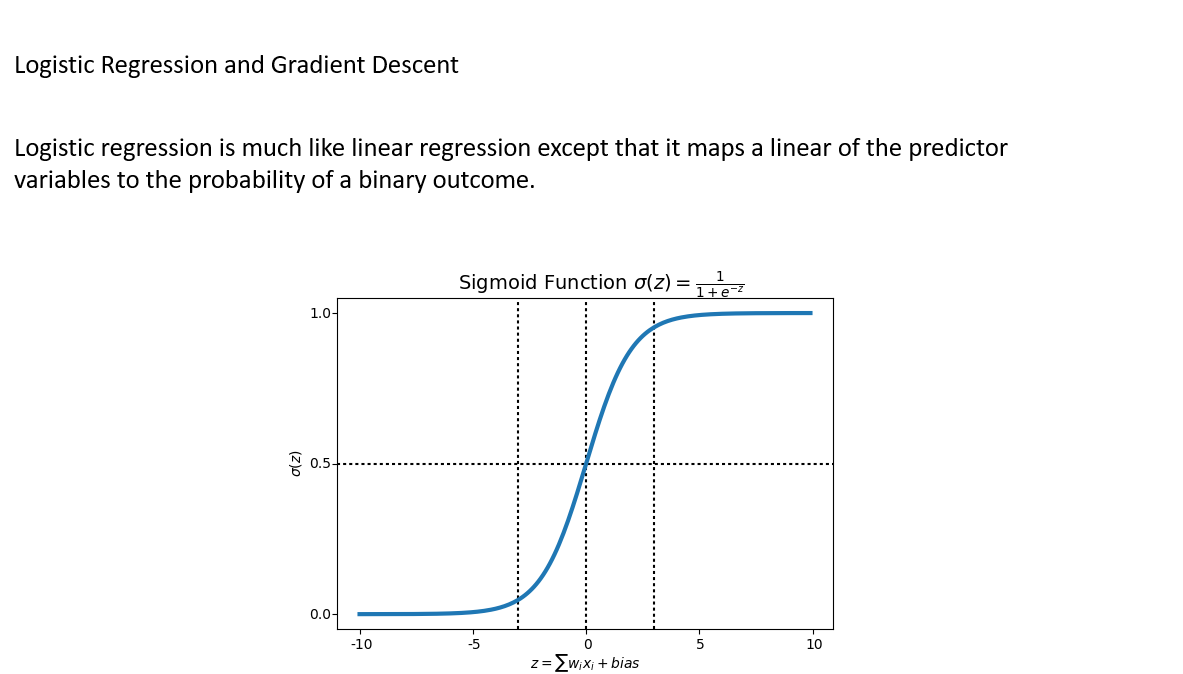

In [ ]:
def logistic_func(x):
  return 1/(1+np.exp(-x))

In [ ]:
logistic_func(0)

0.5

#Task 5: Compute the Cost Function 𝐽(𝜃) and Gradient
* Now that we have defined the logistic sigmoid, we can go ahead and define the objective function for logistic regression.
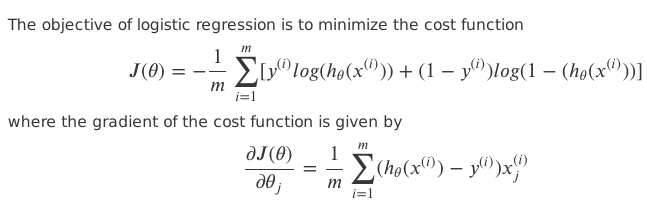

* The mathematics of how we arrived at the result is beyond the scope of this project. But I highly recommend you do some reading on your own time.
* We can use the standard tool from convex optimization, the simplest of which is gradient descent to minimize the cost function. 

In [ ]:
def compute_cost(x,y,theta):
  m = len(y)
  h = np.dot(x , theta)
  y_pred = logistic_func(h)
  error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
  cost = -(1/m) * sum(error)
  gradient = (1/m)*np.dot( x.T , (y_pred-y))
  return cost,gradient


# Task 6: Cost and Gradient at Initialization
* Before doing gradient descent, never forget to do feature scaling for a multivariate problem.
* Initialize the cost and gradient before any optimization steps.

In [ ]:
mean_scores = np.mean(scores,axis = 0)
std_scores = np.std(scores,axis = 0)
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows,1)),scores,axis = 1)
y = results.reshape(rows,1)

theta_init = np.zeros((cols+1,1))
cost,gradient = compute_cost(X,y,theta_init)
print("Cost at initialization",cost)
print("Gradients at initialization",gradient)

Cost at initialization [0.69314718]
Gradients at initialization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


#Task 7: Implement Gradient Descent from scratch in Python
* Recall that the parameters of our model are the 𝜃_j values.
* These are the values we will adjust to minimize the cost J(𝜃).
* One way to do this is to use the batch gradient descent algorithm.
* In batch gradient descent, each iteration performs the following update.
* With each step of gradient descent, the parameters 𝜃_j come closer to the optimal values that will achieve the lowest cost J(𝜃).
* Since we already have a function for computing the gradient previously, let’s not repeat the calculation and add on an alpha term here to update Θ.
* Let’s now actually run gradient descent using our data and run it for 200 iterations.
* The alpha parameter controls how big or small of a step you take in the direction of steepest slope. Set it too small, and your model may take a very long time to converge or never converge. Set it too large and your model may overshoot and never find the minimum.


In [ ]:
def gradient_descent(x,y,theta,alpha,iterations):
  costs = []
  for i in range(iterations):
    cost,gradient = compute_cost(x,y,theta)
    theta -= (alpha*gradient)
    costs.append(cost)
  return theta,costs


In [ ]:
theta,costs = gradient_descent(X,y,theta_init,3.5,200)

In [ ]:
print("Theta after running gradients descent: ",theta)
print("Minimum cost: ",costs[-1])

Theta after running gradients descent:  [[1.7090828 ]
 [3.97279114]
 [3.70578681]]
Minimum cost:  [0.20350031]


#Task 8: Plotting the Convergence of 𝐽(𝜃)
* Let’s plot how the cost function varies with the number of iterations.
* When we ran gradient descent previously, it returns the history of J(𝜃) values in a vector “costs”.
* We will now plot the J values against the number of iterations.

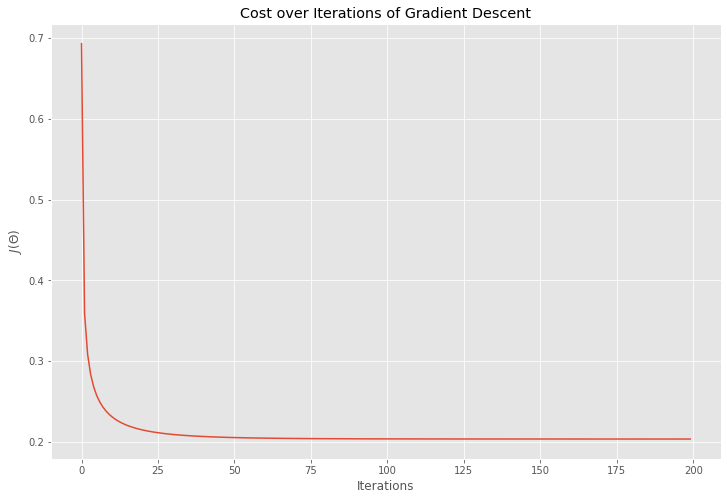

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost over Iterations of Gradient Descent")
plt.show()

#Task 9: Plotting the Decision Boundary
* Let's over the scatterplot from Task 3 with the learned logistic regression decision boundary. 

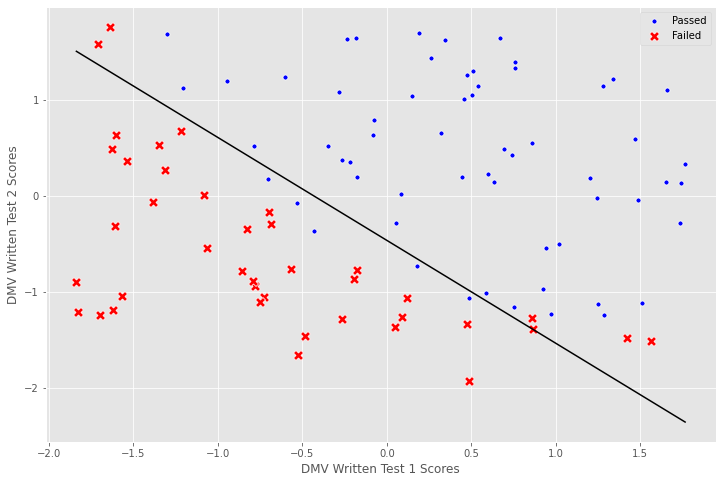

In [ ]:
ax = sns.scatterplot(x= scores[passed[:,0],0],
                     y = scores[passed[:,0],1],
                     marker = ".",
                     color = 'blue',
                     s = 100)
                     
sns.scatterplot(x= scores[failed[:,0],0],
                     y = scores[failed[:,0],1],
                     marker = "X",
                     color = 'red',
                     s = 100)
ax.legend(['Passed','Failed'])
ax.set(xlabel = "DMV Written Test 1 Scores", ylabel = 'DMV Written Test 2 Scores')

x_boundary = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_boundary = -(theta[0]+theta[1]*x_boundary)/theta[2]
sns.lineplot(x=x_boundary,y=y_boundary,color='black')
plt.show();


#Task 10: Predictions Using the Optimized 𝜃 Values
* In this final task, let’s use our final values for 𝜃 to make predictions

In [ ]:
def predict(x,theta):
  results = x.dot(theta)
  return results > 0

In [ ]:
p = predict(X,theta)
print("Training Accuracy: ",sum(p==y)[0],"%")

Training Accuracy:  89 %


In [ ]:
test = np.array([50,79])

test = (test - mean_scores)/std_scores

test = np.append(np.ones(1), test)
probability =  logistic_func(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0],2),"probability of passing")


A person who scores 50 and 79 on their DMV written tests have a 0.74 probability of passing
